In [1]:
import numpy as np
from scipy import linalg
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

In [2]:
df = pd.read_excel('Demo_DataSets.xlsx')

In [3]:
df

,Marketing Budget (X) (In lakhs),Actual Sales(Y) (In crores)
0,127.4,10.5
1,364.4,21.4
2,150.0,10.0
3,128.7,9.6
4,285.9,17.4
5,200.0,12.5
6,303.3,20.0
7,315.7,21.0
8,169.8,14.7
9,104.9,10.1


(17, 2)


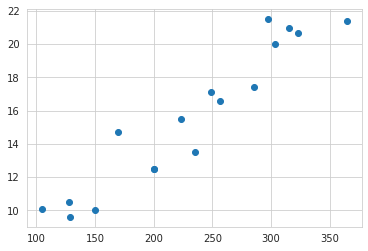

In [4]:
print(df.shape)

plt.scatter(df['Marketing Budget (X) (In lakhs)'], df['Actual Sales(Y) (In crores)'])
plt.show();

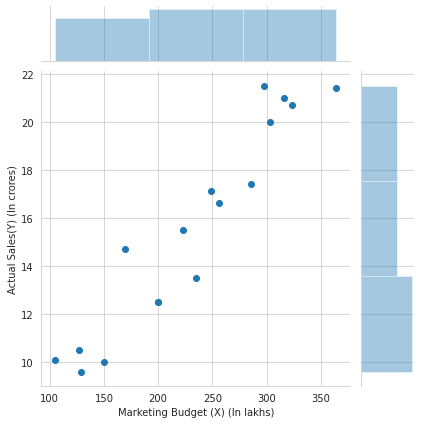

In [5]:
# joint plots of Profit and Sales

sns.jointplot('Marketing Budget (X) (In lakhs)', 'Actual Sales(Y) (In crores)', df)
plt.show()

### Now lets also check the distribution of marketing and sales

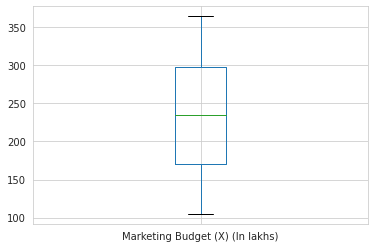

In [6]:
df['Marketing Budget (X) (In lakhs)'].plot(kind='box');

In [7]:
df['Marketing Budget (X) (In lakhs)'].mean()

231.43529411764703

In [8]:
df['Marketing Budget (X) (In lakhs)'].median()

235.0

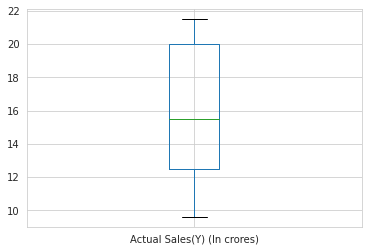

In [9]:
df['Actual Sales(Y) (In crores)'].plot(kind='box');

from the above distribution we see that the x variable is normally distributed, since it's mean and median are same,
 so we do not need to standardize the x variable

we know that the Equation of a straight line is:  
y = mx + b

So, The Equation of a Tangent line at any point x will be:  
f(x) = mx + b

We already know y and x, therefore in order to solve the above equation we need m which is:  
m = y2 - y1 / x2 - x1

Also, we need to calculate the cost function a simple MSE:
\begin{equation*}
f(MSE) = \frac{1}{n}\sum_{i=1}^{n} (y_{i} - (m*x_{i} + b))^{2}
\end{equation*}

Now, in order to find out the optimal value of M and B, we need to find the Slope of the above equation with respect of M:
\begin{equation*}
\frac{d(MSE)}{dm} = \frac{2}{n}\sum_{i=1}^{n} -x_{i}(y_{i} - (m*x_{i} + b))
\end{equation*}

and with respect to B:
\begin{equation*}
\frac{d(MSE)}{db} = \frac{2}{n}\sum_{i=1}^{n} (y_{i} - (m*x_{i} + b))
\end{equation*}

Now, we need to iterate through the initial value of M and B which we found in the first stage  
and on each iteration we need to check the value of slope of MSE with respect to M and B, and  
if it is very very small we are done with our gredient descent

But, in order to find out the optimal value of M and B, we need to keep guessing..
and in order to do so we need to add or suptract M and B by certain number. That certain number is called 
Learning Rate "LR", which means how much do we need to adjust M or B to reach optimal MSE or slope close to 0

so we take the learning rate as 0.02 and multiply with the slope to get the adjustment needed for M or B

LR = 0.02

Adjustment In M can be defind as below:

\begin{equation*}
\triangle_{M_{n}} = \frac{d(MSE)}{dm_{n}} * LR
\end{equation*}

Adjustment In B can be defind as below:

\begin{equation*}
\triangle_{B_{n}} = \frac{d(MSE)}{db_{n}} * LR
\end{equation*}

after we found out the adjustment in M and B, we need to again recalculate the MSE by subtracting the M and B from 
the previous value of M and B

Suppose the Initial value of: 

\begin{equation*}
M_{1} = 0 ;  B_{1} = 0
\end{equation*}

therefore the nth value of M and B:
\begin{equation*}
M_{n} = M_{n-1} - \triangle_{M_{n-1}}
\end{equation*}

\begin{equation*}
B_{n} = B_{n-1} - \triangle_{B_{n-1}}
\end{equation*}

Now, the question is when is to stop the iteration, we will use RELU activation which is MAX(0, f(x))

which means the f(x) of the tanget line at any point in x cannot be less than 0

#### Now lets calculate the initial value of M and B using matrix multiplication

In [10]:
# so first we need to convert our data sets into matrix form
# but first we need to introduce a new column with only 1 for matrix multiplication

In [11]:
df["X_prime"] = pd.DataFrame([1 for item in range(len(df['Marketing Budget (X) (In lakhs)']))])

In [12]:
X = df[["X_prime", "Marketing Budget (X) (In lakhs)"]].to_numpy()

In [13]:
X.shape

(17, 2)

In [14]:
X

array([[  1. , 127.4],
       [  1. , 364.4],
       [  1. , 150. ],
       [  1. , 128.7],
       [  1. , 285.9],
       [  1. , 200. ],
       [  1. , 303.3],
       [  1. , 315.7],
       [  1. , 169.8],
       [  1. , 104.9],
       [  1. , 297.7],
       [  1. , 256.4],
       [  1. , 249.1],
       [  1. , 323.1],
       [  1. , 223. ],
       [  1. , 235. ],
       [  1. , 200. ]])

In [15]:
# Now we also need to convert y to numpy array
Y = df["Actual Sales(Y) (In crores)"].to_numpy()

In [16]:
Y

array([10.5, 21.4, 10. ,  9.6, 17.4, 12.5, 20. , 21. , 14.7, 10.1, 21.5,
       16.6, 17.1, 20.7, 15.5, 13.5, 12.5])

Now the matrix form to calculate the M and B is:  
\begin{equation*}
\begin{bmatrix}b \\m \end{bmatrix} = (\begin{bmatrix}X\end{bmatrix}^{T} \begin{bmatrix}X\end{bmatrix})^{-1} \begin{bmatrix}X\end{bmatrix}^{T}Y
\end{equation*}

In [17]:
# Multiply X by its transpose
A = X.transpose().dot(X)

In [18]:
# Calculate the inverse of A
B = linalg.inv(A)

In [19]:
# Multiply the result by the transpose of X
C = B.dot(X.transpose())

In [20]:
# Multiply the result by the vector Y:
D = C.dot(Y)

In [21]:
# now we have the intercept and slope that we can use as an initial value for Gredient descent
D

array([3.35249683, 0.05276727])